<a href="https://colab.research.google.com/github/NguyenKimLong-20146222/AI-sang-thu-7/blob/main/AI_W6_11_03_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=79d602e6c654e3edc840c4fad953ef6d9b71ff0a70f8904f35b5d7ed9201015e
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


126.38888888888886


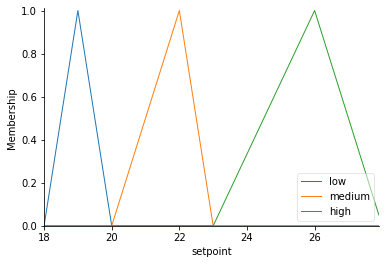

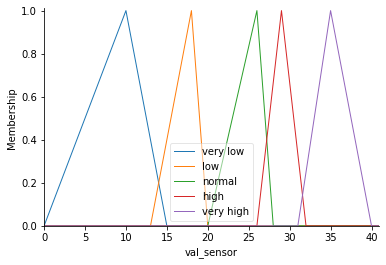

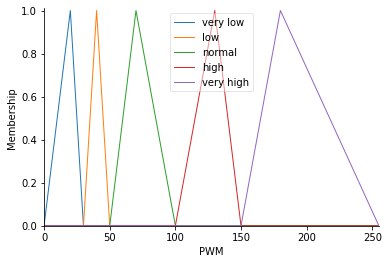

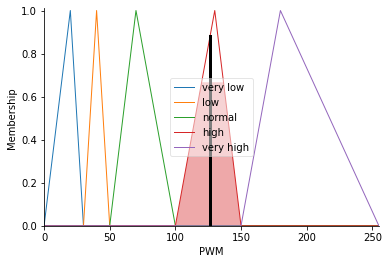

In [13]:
#điều khiển quạt 
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

setpoint=ctrl.Antecedent(np.arange(18,28,0.1),'setpoint')
val_sensor=ctrl.Antecedent(np.arange(0,41,0.1),'val_sensor')
PWM=ctrl.Consequent(np.arange(0,256,1),'PWM')

setpoint['low']=fuzz.trimf(setpoint.universe,[18,19,20])
setpoint['medium']=fuzz.trimf(setpoint.universe,[20,22,23])
setpoint['high']=fuzz.trimf(setpoint.universe,[23,26,28])

val_sensor['very low']=fuzz.trimf(val_sensor.universe,[0,10,15])
val_sensor['low']=fuzz.trimf(val_sensor.universe,[13,18,20])
val_sensor['normal']=fuzz.trimf(val_sensor.universe,[20,26,28])
val_sensor['high']=fuzz.trimf(val_sensor.universe,[26,29,32])
val_sensor['very high']=fuzz.trimf(val_sensor.universe,[31,35,40])


PWM['very low']=fuzz.trimf(PWM.universe,[0,20,30])
PWM['low']=fuzz.trimf(PWM.universe,[30,40,50])
PWM['normal']=fuzz.trimf(PWM.universe,[50,70,100])
PWM['high']=fuzz.trimf(PWM.universe,[100,130,150])
PWM['very high']=fuzz.trimf(PWM.universe,[150,180,255])


setpoint.view()
val_sensor.view()
PWM.view()

rule1= ctrl.Rule(setpoint['low']&val_sensor['very low'],PWM['very low'])
rule2= ctrl.Rule(setpoint['low']&val_sensor['low'],PWM['low'])
rule3= ctrl.Rule(setpoint['low']&val_sensor['normal'],PWM['low'])
rule4= ctrl.Rule(setpoint['low']&val_sensor['high'],PWM['normal'])
rule5= ctrl.Rule(setpoint['low']&val_sensor['very high'],PWM['normal'])

rule6= ctrl.Rule(setpoint['medium']&val_sensor['very low'],PWM['low'])
rule7= ctrl.Rule(setpoint['medium']&val_sensor['low'],PWM['low'])
rule8= ctrl.Rule(setpoint['medium']&val_sensor['normal'],PWM['normal'])
rule9= ctrl.Rule(setpoint['medium']&val_sensor['high'],PWM['high'])
rule10= ctrl.Rule(setpoint['medium']&val_sensor['very high'],PWM['high'])

rule11= ctrl.Rule(setpoint['high']&val_sensor['very low'],PWM['low'])
rule12= ctrl.Rule(setpoint['high']&val_sensor['low'],PWM['low'])
rule13= ctrl.Rule(setpoint['high']&val_sensor['normal'],PWM['high'])
rule14= ctrl.Rule(setpoint['high']&val_sensor['high'],PWM['very high'])
rule15= ctrl.Rule(setpoint['high']&val_sensor['very high'],PWM['very high'])




PWMing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
PWMing = ctrl.ControlSystemSimulation(PWMing_ctrl)
PWMing.input["setpoint"]=25
PWMing.input["val_sensor"]=25
PWMing.compute()
print(PWMing.output["PWM"])
PWM.view (sim = PWMing)








84.44444444444437


171.3198612778442


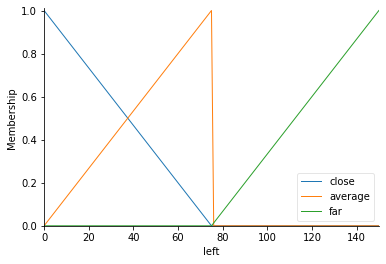

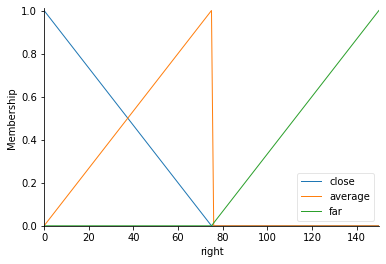

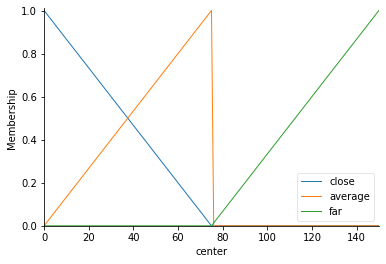

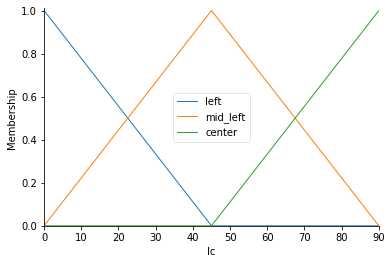

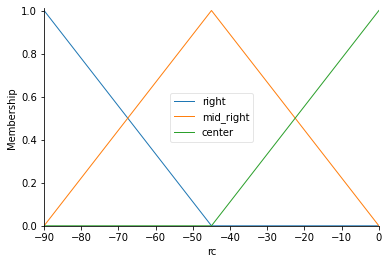

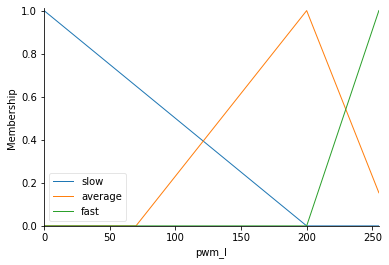

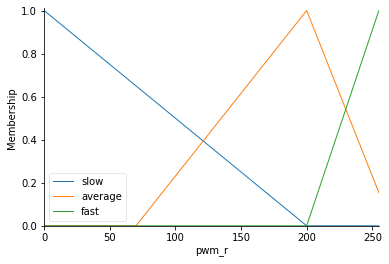

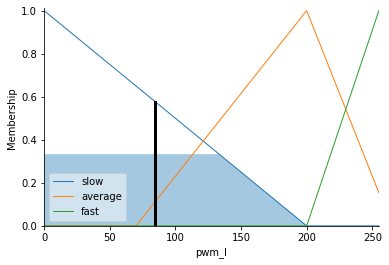

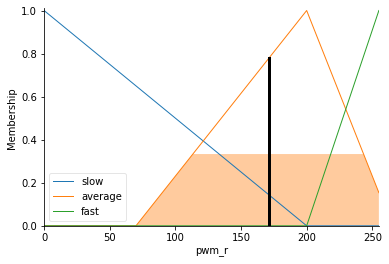

In [20]:
#điều khiển mobile robot
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

L = ctrl.Antecedent(np.arange(0,151,1),'left')
R = ctrl.Antecedent(np.arange(0,151,1),'right')
C = ctrl.Antecedent(np.arange(0,151,1),'center')
LC = ctrl.Consequent(np.arange(0,90.1,0.1),'lc')
RC = ctrl.Consequent(np.arange(-90,0.1,1),'rc')
PWM_L = ctrl.Consequent(np.arange(0,256,1),'pwm_l')
PWM_R = ctrl.Consequent(np.arange(0,256,1),'pwm_r')

L['close']=fuzz.trimf(L.universe,[0,0,75])
L['average']=fuzz.trimf(L.universe,[0,75,75])
L['far']=fuzz.trimf(L.universe,[75,150,150])

R['close']=fuzz.trimf(L.universe,[0,0,75])
R['average']=fuzz.trimf(L.universe,[0,75,75])
R['far']=fuzz.trimf(L.universe,[75,150,150])

C['close']=fuzz.trimf(L.universe,[0,0,75])
C['average']=fuzz.trimf(L.universe,[0,75,75])
C['far']=fuzz.trimf(L.universe,[75,150,150])

LC['left']=fuzz.trimf(LC.universe,[0,0,45])
LC['mid_left']=fuzz.trimf(LC.universe,[0,45,90])
LC['center']=fuzz.trimf(LC.universe,[45,90,90])

RC['right']=fuzz.trimf(RC.universe,[-90,-90,-45])
RC['mid_right']=fuzz.trimf(RC.universe,[-90,-45,0])
RC['center']=fuzz.trimf(RC.universe,[-45,0,0])

PWM_L['slow']=fuzz.trimf(PWM_L.universe,[0,0,200])
PWM_L['average']=fuzz.trimf(PWM_L.universe,[70,200,265])
PWM_L['fast']=fuzz.trimf(PWM_L.universe,[200,255,255])

PWM_R['slow']=fuzz.trimf(PWM_R.universe,[0,0,200])
PWM_R['average']=fuzz.trimf(PWM_R.universe,[70,200,265])
PWM_R['fast']=fuzz.trimf(PWM_R.universe,[200,255,255])

L.view()
R.view()
C.view()
LC.view()
RC.view()
PWM_L.view()
PWM_R.view()

rule_1=ctrl.Rule(L['close']&C['close'],LC['mid_left'])
rule_2=ctrl.Rule(L['close']&C['average'],LC['left'])
rule_3=ctrl.Rule(L['close']&C['far'],LC['left'])
rule_4=ctrl.Rule(L['average']&C['close'],LC['center'])
rule_5=ctrl.Rule(L['average']&C['average'],LC['mid_left'])
rule_6=ctrl.Rule(L['average']&C['far'],LC['left'])
rule_7=ctrl.Rule(L['far']&C['close'],LC['center'])
rule_8=ctrl.Rule(L['far']&C['average'],LC['center'])
rule_9=ctrl.Rule(L['far']&C['far'],LC['mid_left'])

rule_10=ctrl.Rule(R['close']&C['close'],RC['mid_right'])
rule_11=ctrl.Rule(R['close']&C['average'],RC['right'])
rule_12=ctrl.Rule(R['close']&C['far'],RC['right'])
rule_13=ctrl.Rule(R['average']&C['close'],RC['center'])
rule_14=ctrl.Rule(R['average']&C['average'],RC['mid_right'])
rule_15=ctrl.Rule(R['average']&C['far'],RC['right'])
rule_16=ctrl.Rule(R['far']&C['close'],RC['center'])
rule_17=ctrl.Rule(R['far']&C['average'],RC['center'])
rule_18=ctrl.Rule(R['far']&C['far'],RC['mid_right'])

rule_19=ctrl.Rule(RC['right']&LC['left'],[PWM_L['fast'],PWM_R['fast']])
rule_20=ctrl.Rule(RC['right']&LC['mid_left'],[PWM_L['average'],PWM_R['slow']])
rule_21=ctrl.Rule(RC['right']&LC['center'],[PWM_L['fast'],PWM_R['slow']])
rule_22=ctrl.Rule(RC['mid_right']&LC['left'],[PWM_L['slow'],PWM_R['average']])
rule_23=ctrl.Rule(RC['mid_right']&LC['mid_left'],[PWM_L['average'],PWM_R['average']])
rule_24=ctrl.Rule(RC['mid_right']&LC['center'],[PWM_L['average'],PWM_R['slow']])
rule_25=ctrl.Rule(RC['center']&LC['left'],[PWM_L['slow'],PWM_R['fast']])
rule_26=ctrl.Rule(RC['center']&LC['mid_left'],[PWM_L['slow'],PWM_R['fast']])
rule_27=ctrl.Rule(RC['center']&LC['center'],[PWM_L['average'],PWM_R['average']])

control_robot=ctrl.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9,rule_10,
                                  rule_11,rule_12,rule_13,rule_14,rule_15,rule_16,rule_17,rule_18,rule_19,rule_20,
                                  rule_21,rule_22,rule_23,rule_24,rule_25,rule_26,rule_27])
controlRobot=ctrl.ControlSystemSimulation(control_robot)
controlRobot.input['left']=70
controlRobot.input['center']=120
controlRobot.input['right']=100
controlRobot.compute()
print(controlRobot.output['pwm_l'])
print('\n')
print(controlRobot.output['pwm_r'])
PWM_L.view(sim=controlRobot)
PWM_R.view(sim=controlRobot)
